# Understanding Descriptive Statistics

Import the necessary libraries here:

In [45]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def roll_dice():
   probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
   return random.choices(range(1,7), probabilities)[0]

df = pd.DataFrame(columns=['Roll'])

rows = []
num_rolls = 10
for _ in range(num_rolls):
    roll = roll_dice()
    
    rows.append(pd.DataFrame({'Roll': [roll]}))


df = pd.concat(rows, ignore_index=True)

print(df)

   Roll
0     4
1     6
2     1
3     2
4     4
5     4
6     3
7     1
8     6
9     2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Roll    10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


#### 2.- Plot the results sorted by value.

<Axes: >

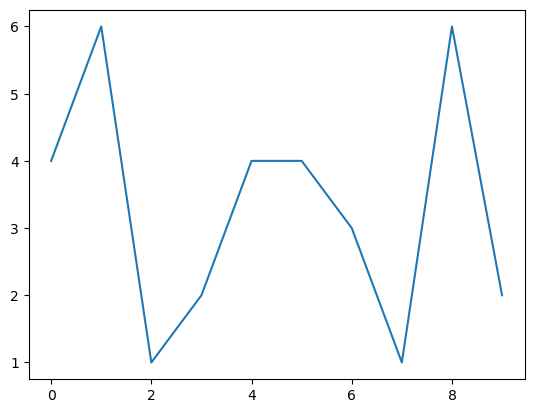

In [4]:
# your code here
df['Roll'].plot()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

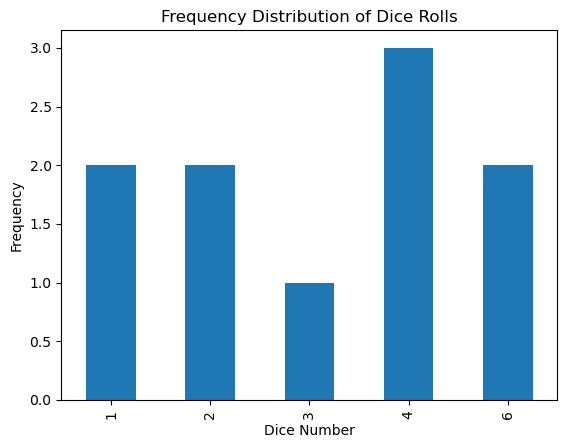

In [5]:
# your code here

frequency = df['Roll'].value_counts().sort_index()


frequency.plot(kind='bar')
plt.title('Frequency Distribution of Dice Rolls')
plt.xlabel('Dice Number')
plt.ylabel('Frequency')
plt.show()




In [6]:
"""
The frequency distribution plot shows how often each number was rolled, providing a summary of the entire rolling sequence. In contrast, the initial plot (if it was a line plot) showed each roll in the order it occurred, which illustrates the randomness in each roll. By comparing both, we can observe not only the individual outcomes but also the overall trend and distribution pattern of the dice rolls.

"""

'\nThe frequency distribution plot shows how often each number was rolled, providing a summary of the entire rolling sequence. In contrast, the initial plot (if it was a line plot) showed each roll in the order it occurred, which illustrates the randomness in each roll. By comparing both, we can observe not only the individual outcomes but also the overall trend and distribution pattern of the dice rolls.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean_calculator(x): 
    mean = sum(x)/len(x)
    return mean

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def calculate_frequency(data_list):
    frequency = {}
    for item in data_list:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1
            
    frequency = sum(frequency)/len(frequency)
    return frequency

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def median_calculator(x): 
    sorted = x.sort()
    if len(sorted) % 2 == 0: 
        median1 = sorted[n//2] 
        median2 = sorted[n//2 - 1] 
        median = (median1 + median2)/2
    else:
        middleIndex = (len(sorted) - 1)/2
        median = x[ middleIndex]
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    Q2 = median_calculator(sorted_data)

    if n % 2 == 0:
        Q1 = median_calculator(sorted_data[:n//2])
        Q3 = median_calculator(sorted_data[n//2:])
    else:
        Q1 = median_calculator(sorted_data[:n//2])
        Q3 = median_calculator(sorted_data[n//2+1:])

   
    Q4 = sorted_data[-1]

    return Q1, Q2, Q3, Q4
    

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [11]:
# your code here
dice = pd.read_csv("../data/roll_the_dice_hundred.csv")
dice = dice.sort_values('value')
dice

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


<Axes: >

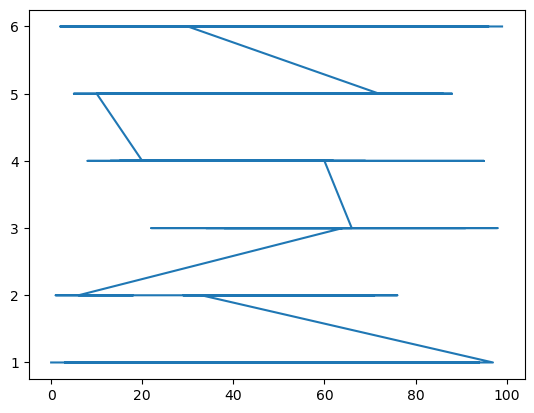

In [12]:
dice['value'].plot()

In [13]:
"""
Very irregular chart, incomprehensive without further data cleaning 
"""

'\nVery irregular chart, incomprehensive without further data cleaning \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here

def calculate_mean_of_dice_rolls(num_rolls=100):
   
    dice_rolls = [random.randint(1, 6) for _ in range(num_rolls)]
    mean_value = sum(dice_rolls) / len(dice_rolls)
    return mean_value

mean_dice_rolls = calculate_mean_of_dice_rolls()
print(f"The mean value of 100 dice rolls is: {mean_dice_rolls}")


The mean value of 100 dice rolls is: 3.32


#### 3.- Now, calculate the frequency distribution.


In [37]:
# your code here

def calculate_mean_and_frequency_of_dice_rolls(num_rolls=100):

    dice_rolls = [random.randint(1, 6) for _ in range(num_rolls)]
    mean_value = sum(dice_rolls) / len(dice_rolls)

    frequency_distribution = Counter(dice_rolls)

    return mean_value, frequency_distribution

mean_dice_rolls, frequency_distribution = calculate_mean_and_frequency_of_dice_rolls()
print("Frequency Distribution:")
for roll, frequency in frequency_distribution.items():
    print(f"{roll}: {frequency}")


Frequency Distribution:
3: 16
4: 15
1: 15
5: 20
2: 17
6: 17


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

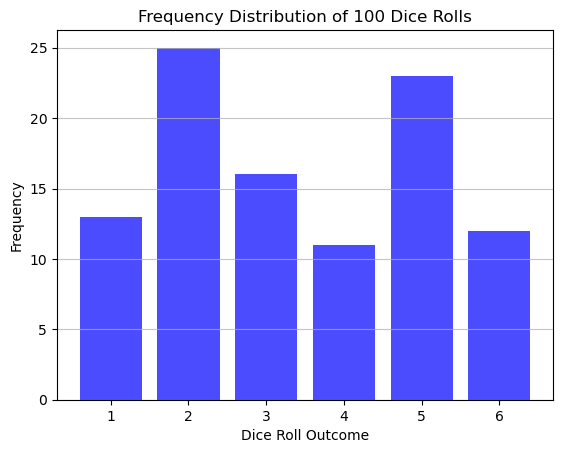

3.42

In [44]:
# your code here

def calculate_frequency_of_dice_rolls(num_rolls=100):
    dice_rolls = [random.randint(1, 6) for _ in range(num_rolls)]
    
    frequency_distribution = Counter(dice_rolls)

    return frequency_distribution


frequency_distribution = calculate_frequency_of_dice_rolls()


plt.bar(frequency_distribution.keys(), frequency_distribution.values(), color='blue', alpha=0.7)
plt.xlabel('Dice Roll Outcome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of 100 Dice Rolls')
plt.xticks(range(1, 7))
plt.grid(axis='y', alpha=0.75)

plt.show()

total_rolls = sum(frequency_distribution.values())
mean_from_distribution = sum(roll * freq for roll, freq in frequency_distribution.items()) / total_rolls
mean_from_distribution


In [17]:
"""
The frequency distribution is more keen on 2 and 5, even if the following chart shows a bigger trend towards 6
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [40]:
# your code here
roll_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")
roll_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


(array([[  1.,   1.,   1.,   1.,   2.],
        [  1.,   1.,   1.,   1.,   2.],
        [175., 167., 175., 168., 315.]]),
 array([1., 2., 3., 4., 5., 6.]),
 <a list of 3 BarContainer objects>)

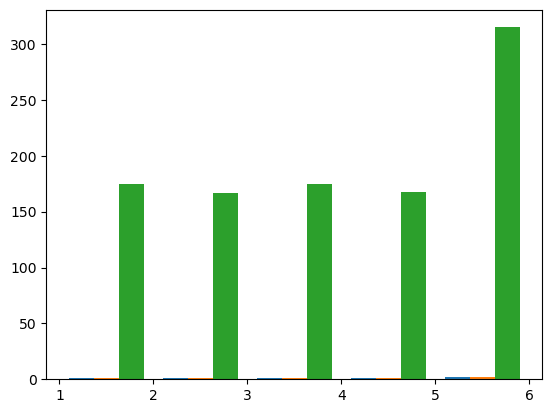

In [43]:
plt.hist(roll_thousand, bins=np.arange(roll_thousand["value"].min(), roll_thousand["value"].max()+1))

In [19]:
"""
It looks that the distribution has more frequency on the value 6
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [47]:
# your code here
agepopulation = pd.read_csv("../data/ages_population.csv")
agepopulation

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


(array([ 2.,  2.,  0.,  1.,  2.,  2.,  1.,  5.,  2.,  3.,  3., 11.,  6.,
        10.,  8.,  8., 10.,  7., 11., 13., 14., 16., 17., 18., 19., 23.,
        25., 20., 26., 34., 24., 30., 22., 29., 33., 31., 30., 30., 45.,
        27., 36., 32., 32., 23., 29., 23., 17., 19., 19., 16.,  9., 14.,
        12., 13., 13., 15.,  7.,  7.,  8.,  4.,  2.,  4.,  7.,  2.,  2.,
         3.,  4.,  3.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
        66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
        79., 80., 81., 82.]),
 <BarContainer object of 81 artists>)

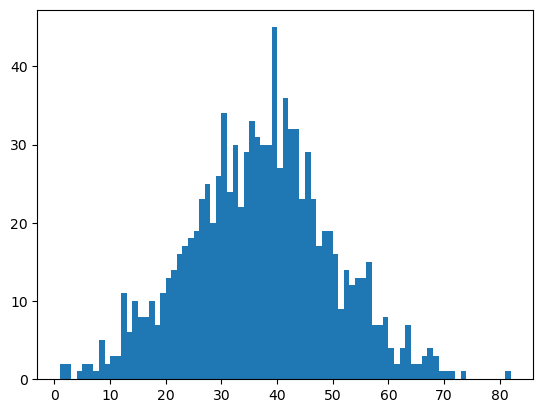

In [53]:
plt.hist(agepopulation, bins=np.arange(agepopulation["observation"].min(), agepopulation["observation"].max()+1))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [59]:
# your code here
agepopulation.std()

observation    12.8165
dtype: float64

In [60]:
agepopulation.mean()

observation    36.56
dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [55]:
# your code here
agepopulation2 = pd.read_csv("../data/ages_population2.csv")
agepopulation2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


(array([  3.,  13.,  17.,  35.,  41.,  78.,  98., 120., 125., 139., 115.,
         90.,  61.,  31.,  22.,   7.,   5.]),
 array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
        32., 33., 34., 35., 36.]),
 <BarContainer object of 17 artists>)

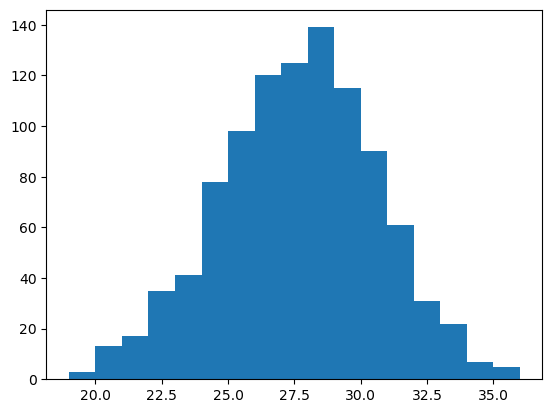

In [56]:
plt.hist(agepopulation2, bins=np.arange(agepopulation2["observation"].min(), agepopulation2["observation"].max()+1))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
The range of ages is minor than in step 1, which means than the people is younger, both on max and min values
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [61]:
# your code here
agepopulation2.std()


observation    2.969814
dtype: float64

In [62]:
agepopulation2.mean()

observation    27.155
dtype: float64

In [26]:
"""
Population 2 is younger than pouplations 1 and 3
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [57]:
# your code here
agepopulation3 = pd.read_csv("../data/ages_population3.csv")
agepopulation3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


(array([ 1.,  2.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  2.,  2.,  4.,  2.,
         5.,  8.,  9., 10.,  9., 12., 11., 14., 11., 11., 19., 17., 15.,
        19., 18., 25., 24., 21., 37., 17., 20., 31., 26., 31., 25., 29.,
        21., 25., 14., 22., 17., 24., 22., 15., 25., 18., 21., 14., 17.,
        14.,  9., 13., 10.,  8.,  6.,  8.,  6.,  6.,  3., 12., 12., 15.,
        19., 22., 17., 17., 19., 11.,  8.,  6.,  6.,  2.,  3.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
        66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.]),
 <BarContainer object of 76 artists>)

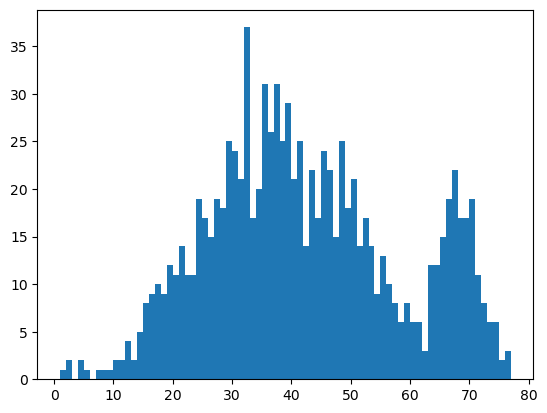

In [58]:
plt.hist(agepopulation3, bins=np.arange(agepopulation3["observation"].min(), agepopulation3["observation"].max()+1))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [63]:
# your code here
agepopulation3.std()

observation    16.144706
dtype: float64

In [65]:
agepopulation3.mean()

observation    41.989
dtype: float64

In [29]:
"""
Population 3 is older than population 1
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [67]:
# your code here
agepopulation.quantile([0.25, 0.5, 0.75, 1])

,observation
0.25,28.0
0.50,37.0
0.75,45.0
1.00,82.0


In [68]:
agepopulation2.quantile([0.25, 0.5, 0.75, 1])

,observation
0.25,25.0
0.50,27.0
0.75,29.0
1.00,36.0


In [69]:
agepopulation3.quantile([0.25, 0.5, 0.75, 1])

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [31]:
"""
Population 3 is older than population 2, being population 1 the secong in age
"""

'\nyour comments here\n'